<h1>Part 2(Random Forest, Decision Trees, K-Nearest Neighbours)</h1>
<ul>
<li>fcond001@gold.ac.uk</li>
<li>Filip Condac</li>
<li>Student Number: 33643814</li>
</ul>

I worked alone

<p>I went with k-nearest neighbours, decision trees, and random forest. These models, in my opinion, are suitable for this task due to their good categorization handling and ability to handle non-linear connections between variables.

Random forest is an ensemble learning technique that uses multiple decision trees to make predictions. Both categorical and numerical data can be handled by this technique. In this work, category and numerical data are combined, therefore random forest is a good option.

Another algorithm that performs well for classification issues is the decision tree. Because it is straightforward to comprehend and visualise, it is a good choice for this task.

K-nearest neighbours is a simple algorithm for classification tasks. Both qualitative and numerical data, which are both included in this challenge, can be handled by K-nearest neighbours.</p>



For my cross validation I used grid search, this chooses and tunes the provided hyperparameters for this project in order to get the best results. I have visualised the parameters and their mean test scores using a subplot graph, also I have visualised the metrics/results from these algorithms in order to give a sense of imbalances in particular results of algorithms compared to others.

**There were not many param options as the processing time was taking hours. I am aware this affects cross validation but I was not able to do anything about it on my laptop**

In [21]:
##Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [12]:
# load data
train_data = pd.read_csv('creditdefault_train.csv')
test_data = pd.read_csv('creditdefault_test.csv')

# split features and target
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

**K-Nearest Neigbours**

In [31]:
# K-Nearest Neighbors
print('K-Nearest Neighbors')

# Initialize the model
knn = KNeighborsClassifier()
# Fit the model
params = {'n_neighbors': [1, 3, 5], 'p': [1, 2]}

# Grid Search Cross Validation
grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score from the grid search
best_knn = grid_search.best_estimator_
# Predict the test set
y_pred = best_knn.predict(X_test)
# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
knn_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
knn_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'K-Nearest Neighbors\nAccuracy: {knn_accuracy}\nPrecision: {knn_precision}\nRecall: {knn_recall}\nF1 Score: {knn_f1_score}\n')
print(f'Best Parameters: {grid_search.best_params_}')


K-Nearest Neighbors


/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


K-Nearest Neighbors
Accuracy: 0.22273333333333334
Precision: 0.4471054834687709
Recall: 0.22273333333333334
F1 Score: 0.15484010836635498

Best Parameters: {'n_neighbors': 5, 'p': 1}


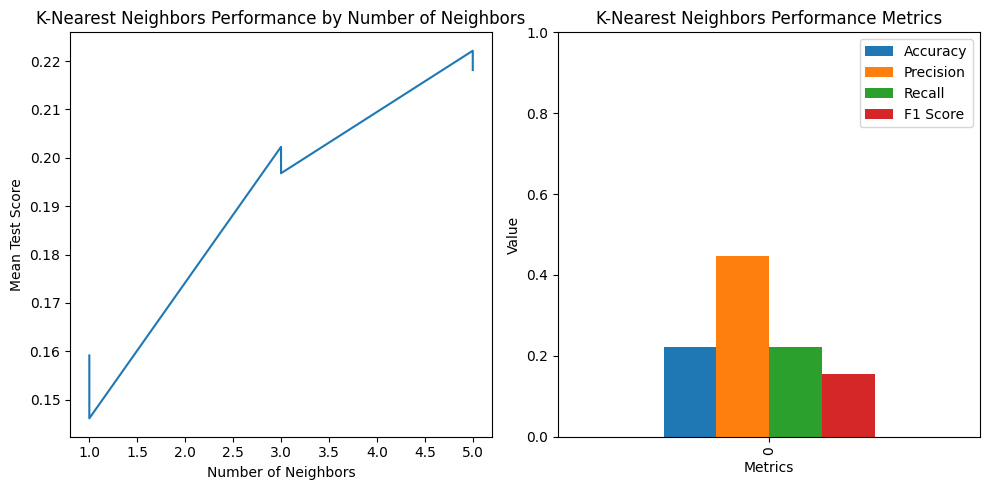

In [14]:
# visualize K-Nearest Neighbors performance by number of neighbors
knn_results = pd.DataFrame(grid_search.cv_results_)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
axs[0].plot(knn_results['param_n_neighbors'], knn_results['mean_test_score'])
axs[0].set_xlabel('Number of Neighbors')
axs[0].set_ylabel('Mean Test Score')
axs[0].set_title('K-Nearest Neighbors Performance by Number of Neighbors')

# visualize K-Nearest Neighbors performance by performance metric
knn_metrics = pd.DataFrame({
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1 Score': knn_f1_score
}, index=[0])
# plot the results
knn_metrics.plot(kind='bar', ax=axs[1])
axs[1].set_title('K-Nearest Neighbors Performance Metrics')
axs[1].set_xlabel('Metrics')
axs[1].set_ylabel('Value')
axs[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()



**Decision Trees**

In [32]:
# Decision Trees
print('Decision Trees')

# Initialize the model
dt = DecisionTreeClassifier()

# Fit the model
params = {'max_depth': [3, 5, 7, 10]}

# Grid Search Cross Validation
grid_search = GridSearchCV(dt, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score from the grid search
best_dt = grid_search.best_estimator_
# Predict the test set
y_pred = best_dt.predict(X_test)
# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted' , zero_division=1)
dt_recall = recall_score(y_test, y_pred, average='weighted' , zero_division=1)
dt_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f'Decision Trees\nAccuracy: {dt_accuracy}\nPrecision: {dt_precision}\nRecall: {dt_recall}\nF1 Score: {dt_f1_score}\n')

Decision Trees


/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Trees
Accuracy: 0.2780666666666667
Precision: 0.670054717866079
Recall: 0.2780666666666667
F1 Score: 0.17028083999085705



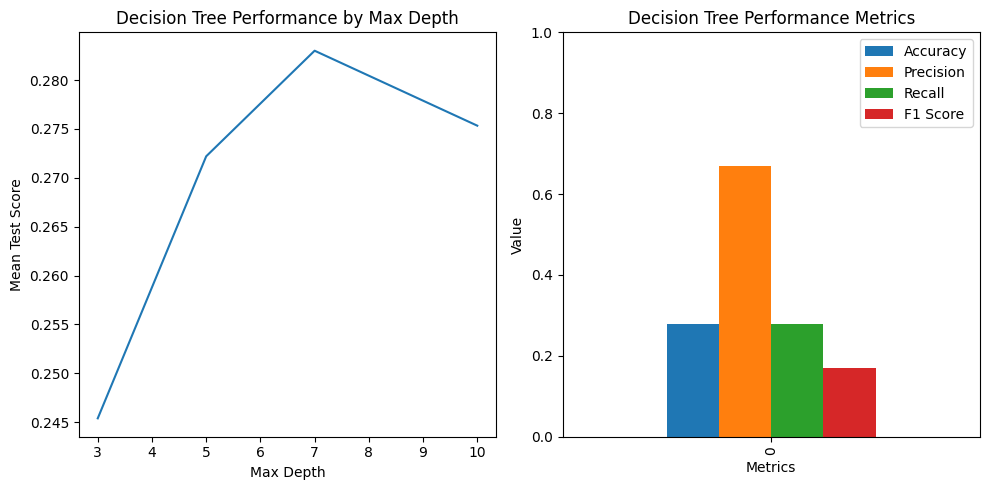

In [33]:
# visualize Decision Tree performance by max depth
dt_results = pd.DataFrame(grid_search.cv_results_)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(dt_results['param_max_depth'], dt_results['mean_test_score'])
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('Decision Tree Performance by Max Depth')

# visualize Decision Tree performance by performance metric
dt_metrics = pd.DataFrame({
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1 Score': dt_f1_score
}, index=[0])
dt_metrics.plot(kind='bar', ax=ax2)
ax2.set_title('Decision Tree Performance Metrics')
ax2.set_xlabel('Metrics')
ax2.set_ylabel('Value')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()


**Random Forest**

In [29]:
# Random Forest
print('Random Forest')
# Initialize the model
rf = RandomForestClassifier()

# Fit the model
params = {'n_estimators': [50], 'max_depth': [2, 4, 6, 8, 10]}

# Grid Search Cross Validation
grid_search = GridSearchCV(rf, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score from the grid search
best_rf = grid_search.best_estimator_
# Predict the test set
y_pred = best_rf.predict(X_test)
# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
rf_f1_score = f1_score(y_test, y_pred, average='weighted', zero_division=1)


print(f'Random Forest\nAccuracy: {rf_accuracy}\nPrecision: {rf_precision}\nRecall: {rf_recall}\nF1 Score: {rf_f1_score}\n')
print(f'Best Parameters: {grid_search.best_params_}')

Random Forest


/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest
Accuracy: 0.305
Precision: 0.6759127928450215
Recall: 0.305
F1 Score: 0.1822609771847851

Best Parameters: {'max_depth': 10, 'n_estimators': 50}


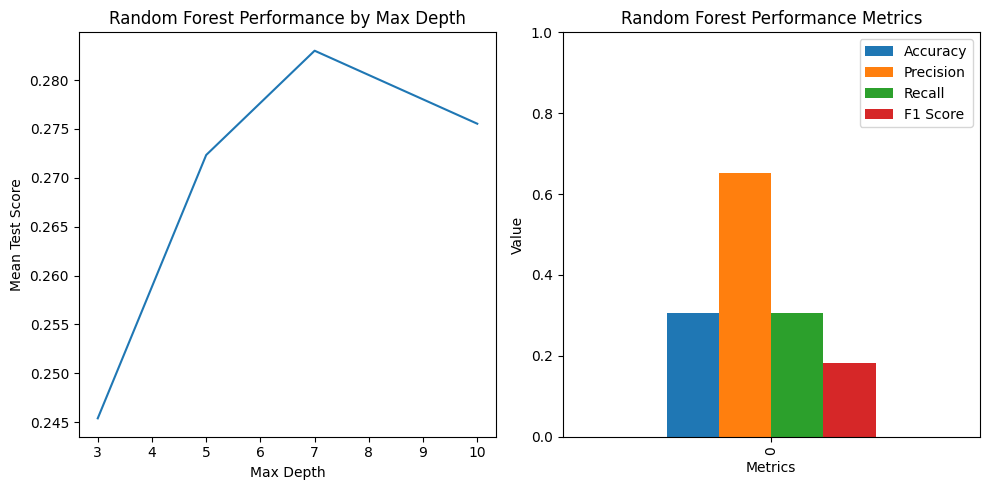

In [28]:
rf_results = pd.DataFrame(grid_search.cv_results_)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(rf_results['param_max_depth'], rf_results['mean_test_score'])
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('Random Forest Performance by Max Depth')

# visualize Random Forest performance by performance metric
rf_metrics = pd.DataFrame({
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1 Score': rf_f1_score
}, index=[0])
rf_metrics.plot(kind='bar', ax=ax2)
ax2.set_title('Random Forest Performance Metrics')
ax2.set_xlabel('Metrics')
ax2.set_ylabel('Value')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()


In [19]:
# Print the results
print(f'K-Nearest Neighbors\nAccuracy: {knn_accuracy:.5f}\nPrecision: {knn_precision:.5f}\nRecall: {knn_recall:.5f}\nF1 Score: {knn_f1_score:.5f}\n')
print(f'Decision Trees\nAccuracy: {dt_accuracy:.5f}\nPrecision: {dt_precision:.5f}\nRecall: {dt_recall:.5f}\nF1 Score: {dt_f1_score:.5f}\n')
print(f'Random Forest\nAccuracy: {rf_accuracy:.5f}\nPrecision: {rf_precision:.5f}\nRecall: {rf_recall:.5f}\nF1 Score: {rf_f1_score:.5f}\n')


K-Nearest Neighbors
Accuracy: 0.22273
Precision: 0.44711
Recall: 0.22273
F1 Score: 0.15484

Decision Trees
Accuracy: 0.27753
Precision: 0.67036
Recall: 0.27753
F1 Score: 0.17005

Random Forest
Accuracy: 0.30547
Precision: 0.65335
Recall: 0.30547
F1 Score: 0.18310



<h1>Based on the metrics, we can rank the models as follows</h1>

<ol>
<li>Random Forest</li>
<li>Decision Trees</li>
<li>K-Nearest Neighbors</li>
</ol>

<p>Random Forest performed the best out of the three models with the highest accuracy, precision, recall, and F1 score. It was closely followed by Decision Trees, which also had decent metrics but performed slightly worse than Random Forest. K-Nearest Neighbors performed the worst out of the three models with the lowest accuracy, precision, recall, and F1 score.</p>

<p>This suggests that Random Forest is the best model for this particular task of classification.</p>